# Implementing a 4 parameter logistic curve in Python
Two websites I found that look helpful.
http://people.duke.edu/~ccc14/pcfb/analysis.html
This links to a nice python implementation of 4pl that I will see if I can get to work.
https://www.aphis.usda.gov/animal_health/vet_biologics/publications/STATWI0005.pdf
This odd link had a great explanation of what is going on in a 4pl implementation. This is what really made it start clicking for me.

In [23]:
%matplotlib inline

import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

I learned that you need to include '%matplotlib inline' if you want want a graph to show up in your Jupyter notebook.

In [3]:
def logistic4(x, A, B, C, D):
    """4PL logistic equation."""
    return ((A - D)/(1.0 + ((x / C)**B))) + D

The parameters in a 4PL curve are the following:
* A and D are the upper and lower asymptotes. Since I am thinking in terms of ELISA assays, which one is upper or lower depends on whether it is a competitive assay or not.
* B is the scale factor. I basically think of this as the approximate slope at the inflection point. This is an imperfect way to think about it, but it gets the job done.
* C is the location parameter. This is where the inflection point between the two asymptotes is at.
* x would be, in the case of an ELISA, the concentration parameter.

In [4]:
def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A, B, C, D = p
    err = y-logistic4(x, A, B, C, D)
    return err

In [18]:
def peval(x, p):
    """Evaluated value at x with current parameters."""
    A, B, C, D = p
    return logistic4(x, A, B, C, D)

In [11]:
x = np.linspace(0.001, 20, 20)
A, B, C, D = 0.5, 2.5, 8, 7.3
y_true = logistic4(x, A, B, C, D)
y_meas = y_true + 0.2 * npr.randn(len(x))

In [14]:
p0 = [0, 1, 1, 1]

In [16]:
plsq = leastsq(residuals, p0, args = (y_meas, x))

When this section tried to run I encountered an error because something was getting divided by zero. When I adjusted x = np.linspace(0, 20, 20) into (0.001, 20, 20) to get everything working.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

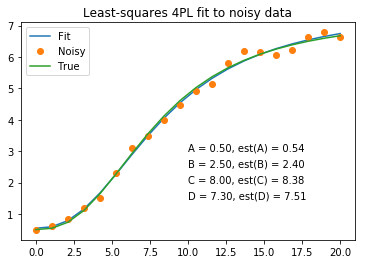

In [25]:
plt.plot(x, peval(x, plsq[0]), x, y_meas, 'o', x, y_true)
plt.title('Least-squares 4PL fit to noisy data')
plt.legend(['Fit', 'Noisy', 'True'], loc = 'upper left')
for i, (param, actual, est) in enumerate(zip('ABCD', [A, B, C, D], plsq[0])):
    plt.text(10, 3 - i * 0.5, '%s = %.2f, est(%s) = %.2f' % (param, actual, param, est))
#plt.savefig('logistic.png')
plt